In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

# Методы Монте-Карло

В лабораторной [про квадратурные формулы](Integration.ipynb) мы пытались посчитать объем четырехмерного шара
методами трапеций и Симпсона. Абсолютная погрешность этих метод имеет асимптотику $h^d$ при шаге решетки $h\to0$,
где $d$ - порядок метода.
Число точек, в которых должно быть вычислено подинтегральное выражение, изменяется как $h^{-D}$, где $D=4$ - размерность пространства.
Для больших размерностей $D$ это делает использование квадратурных формул почти невозможным.
Существует однако возможность использовать небольшое число случайно выбранных точек для оценки интеграла, вмество построения мелкой решетки.
Этот подход базируется на связи интегралов и средних значений случайных величин:
$$
E_p[f]=\int_{\Omega} f(x)p(x)dx,
$$
где $f$ случайная величина, заданная на множестве $\Omega$ элементарных событий с плотностью распределения $p$,
$E_p[f]$ обозначает среднее значение $f$ на этом распределении.
Если мы имеем возможность генерировать выборку значений $x_k$ случайной величины $X$, отвечающей $p$,
то среднее значение оценивается статистикой:
$$
E_p[f] \approx M_N = \frac{1}{N}\sum_{n=1}^N f(x_n),
$$
что дает нам связь между интегралом и суммой по случайно выбранным точкам.
Методы интегрирования на основе случайных выборок обычно называют методами Монте-Карло.

Среднее арифметическое $M_N$ также является случайной величиной,
дисперсия которой оценивается как
$$
\sigma(M_n)^2 = \frac{\sigma_p(f)^2}{N},
$$
где $\sigma_p(f)^2$ обозначает дисперсию случайной величины $f$.
Согласно этой формуле ошибка оценивания интеграла средним арфиметическим убывает как $N^{-\frac12}$,
что довольно медленно, однако эта скорость не зависит от размерности пространства,
что делает метод Монте-Карло предпочтительным для задач большой размерности.

Для вычисления обьема четырехмерного шара $B=\{x\in\mathbb R^4\colon |x|^2\leq 1\},$
мы возьмем случайную величину $X$ равномерно распределенную на кубе $\Omega=[-1,1]^{\times 4}$.
Воспользуемся очевидными тождествами:
$$\frac{V(B)}{V(\Omega)}=P\{X\in B\}=E[1_B],$$
где $1_B$ - характеристическая функция множества $B$:
$$
1_B(x)=\begin{cases}
1,&x\in B,\\
0,&x\notin B.
\end{cases}
$$

In [7]:
# Для семплирования разных распределений удобно использовать пакет numpy.random.
# Создадим выборку из N=10000 равномерно распределенных на Omega значений.
N = 100000 # Размер выборки
D = 6 # Размерность пространства
x = np.random.rand(N, D)*2-1
# Найдем значения, попадающие в шар B
is_x_in_B = np.sum(x**2, axis=1)<1
# Посчитаем число попавших в B значений
x_in_B_count = np.sum(is_x_in_B)
# Оцениваем вероятность попасти в шар
p_x_in_B = x_in_B_count / N
# Обьем куба
V_Omega = 2 ** D
# Наконец искомый интеграл равен
V_B_estimated = p_x_in_B * V_Omega
# Аналитическое значение интеграла
V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
print("Exact volume", V_B_analytic)
print("Estimated volume", V_B_estimated)
print("Relative error", np.abs(V_B_estimated-V_B_analytic)/V_B_analytic)


Exact volume 5.167712780049969
Estimated volume 5.06432
Relative error 0.02000745483555478


## Задания:

### 1. Вычислите методом Монте-Карло объемы $D$-мерных шаров радиуса $R=1$ для $D=1\ldots 15$ с выборками размера $N=1\ldots 10^6$.
Постройте график зависимости средней квадратической относительной ошибки объема от $N$ для разных $D$. Оцените асимптотику ошибки при $N\to\infty$.

In [8]:
from tqdm.notebook import tqdm
from matplotlib import cm

In [9]:
def monte_carlo_volume(D, N):
    x = np.random.rand(N, D)*2-1
    is_x_in_B = np.sum(x**2, axis=1)<1
    x_in_B_count = np.sum(is_x_in_B)
    p_x_in_B = x_in_B_count / N
    V_Omega = 2 ** D
    V_B_estimated = p_x_in_B * V_Omega
    return V_B_estimated

D_values = np.arange(1, 16)
N_values = np.logspace(0, 6, num=31).astype(int)
errors = np.zeros((len(D_values), len(N_values)))

for i, D in enumerate(tqdm(D_values, desc="Dimensions")):
    V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
    for j, N in enumerate(tqdm(N_values, desc="Sample Sizes", leave=False)):
        trials = 10
        error = 0
        for _ in range(trials):
            error += np.abs(monte_carlo_volume(D, N)-V_B_analytic)/V_B_analytic
        errors[i, j] = error / trials

Dimensions:   0%|          | 0/15 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

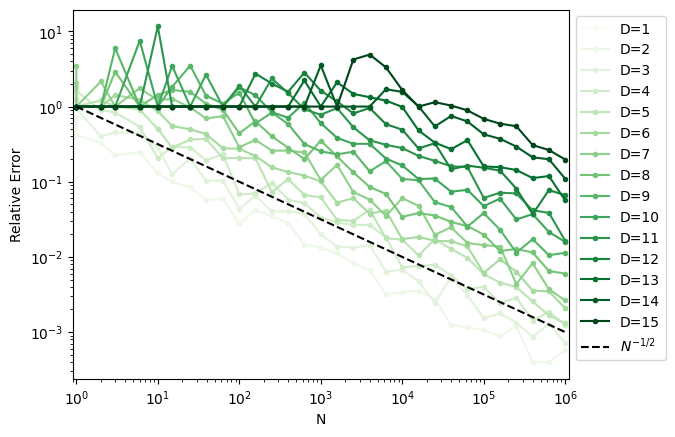

In [10]:
cmap = cm.get_cmap('Greens', len(D_values))
for i, D in enumerate(D_values):
    color = cmap(i)
    plt.loglog(N_values, errors[i], ".-", label=f'D={D}', color=color)
plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(min(N_values)*0.9, max(N_values)*1.1)
plt.show()

### 2. Теоретически обоснуйте наблюдаемую зависимость средней квадратической ошибки от размера выборки.

Ошибка метода Монте-Карло определяется стандартной ошибкой среднего:
$$\Delta=\sqrt{\frac{p(1−p)}{N}},$$
где $p$ — вероятность попадания точки в шар.

Относительная ошибка:
$$\varepsilon=\frac\Delta p=\sqrt{\frac{(1−p)}{pN}}$$

Для $D=1$ $p=1$, а с увеличением $D$ $p$ уменьшается - $\varepsilon$ увеличивается.

Асимптотика:
При $N\to\infty$, ошибка убывает как $N^{−1/2}$, что подтверждается графиком.

### 3. Как можно оценить предельную ошибку вычисления интеграла методом Монте-Карло?

Предельную ошибку можно оценить через стандартную ошибку $\Delta$.

### 4. Сравните ошибку метода Монте-Карло с результатами лабораторной [про квадратурные формулы](Integration.ipynb). Для каких размерностей $D$ метод Монте-Карло оказывается точнее, чем вычисление через произведение составных формул Симпсона по каждой из координат?

Возьмем код из лабораторной про квадратурные формулы (для четырехмерного гиперкуба) и допишем его для других размерностей:

Dimensions:   0%|          | 0/3 [00:00<?, ?it/s]

D=1, Simpson:   0%|          | 0/10 [00:00<?, ?it/s]

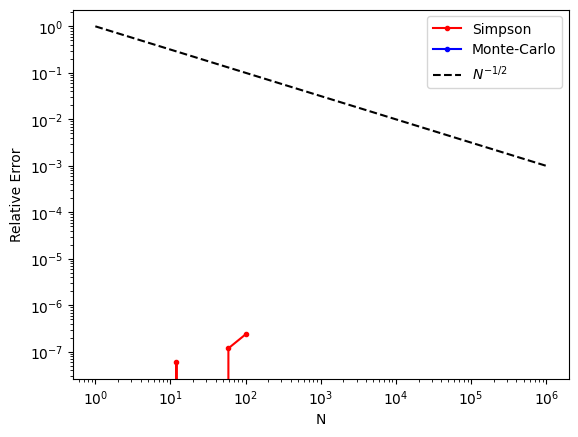

D=2, Simpson:   0%|          | 0/10 [00:00<?, ?it/s]

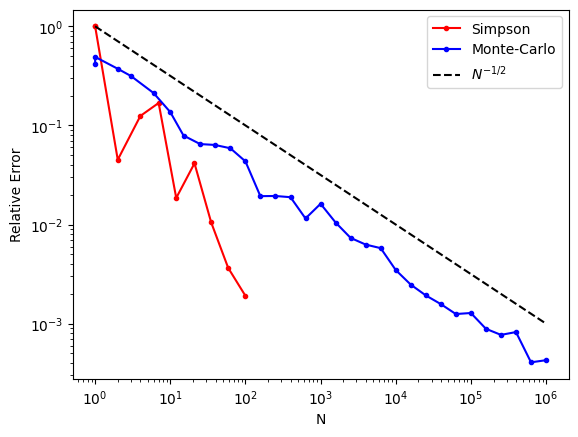

D=3, Simpson:   0%|          | 0/10 [00:00<?, ?it/s]

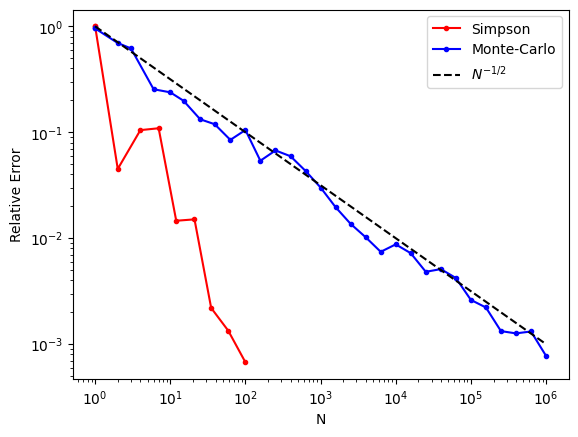

In [ ]:
import psutil

def get_memory_usage():
    return psutil.virtual_memory().percent

def compute_integral(D, M):
    h = 2 / M
    x = np.linspace(-1, 1, M + 1)
    w = np.full(M + 1, h, dtype=np.float32)
    w[0] = w[-1] = h / 2

    W = w.copy()
    for _ in range(D - 1):
        W = np.outer(W, w)
    W = W.reshape([M+1]*D)

    grid = np.meshgrid(*([x] * D), indexing='ij')
    R_sq = np.sum(np.stack([axis**2 for axis in grid], axis=0), axis=0)
    chi = (R_sq <= 1).astype(np.float32)
    return np.sum(W * chi)

D_values1 = np.arange(1, 4)
N_values1 = np.logspace(0, 2, num=10).astype(int)

for i, D in enumerate(tqdm(D_values1, desc="Dimensions")):
    V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2 + 1)
    simpson_errors = []

    for j, N in enumerate(tqdm(N_values1, desc=f"D={D}, Simpson")):
        if get_memory_usage() > 70:
            print(f"Memory overflow at D={D}, N={N}! Skipping...")
            simpson_errors.append(np.nan)
            continue

        trials = 5
        error = 0
        valid_trials = 0
        for _ in range(trials):
            integral = compute_integral(D, N)
            if not np.isnan(integral):
                error += np.abs(integral - V_B_analytic) / V_B_analytic
                valid_trials += 1
        if valid_trials > 0:
            simpson_errors.append(error / valid_trials)
        else:
            simpson_errors.append(np.nan)

    plt.figure()
    plt.loglog(N_values1, simpson_errors, 'r.-', label='Simpson')
    plt.loglog(N_values, errors[i], "b.-", label='Monte-Carlo')
    plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
    plt.xlabel('N')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.show()

При больших размерностях, чем 4, Симпсон просто не посчитался (потребовалось больше оперативной памяти, чем доступно.) При посчитанных $D=1\dots 4$, однако, его точность выше, чем у Монте-Карло.

# Уменьшение ошибки метода Монте-Карло

Предположим мы хотим вычислить интеграл

$$I=\int_{\Omega} f(x)dx,$$

методом Монте-Карло, для этого мы представляем его в виде среднего математического величины $f(x)/p(x)$,
на плотности распределения $p$:

$$
I = E_p[f/p] = \int_{\Omega}\frac{f(x)}{p(x)}p(x)dx.
$$

Пусть $x_n$ выборка случайной величины $X$ с плотностью $p$, тогда
$$
I\approx M_N=\frac{1}{N}\sum_{n=1}^N \frac{f(x_n)}{p(x_n)}.
$$
Дисперсия $M_N$ выражает меру ошибки:
$$
\sigma(M_N)^2 = \frac{1}{N}\sigma_p(f/p)^2=\frac{1}{N}\int_{\Omega} \left(\frac{f(x)}{p(x)}-I\right)^2 p(x)dx.
$$
Можно видеть, что хотя для всех $p$ среднее значение $M_N$ совпадает с искомым интегралом $I$,
величина ошибка существенно зависит от выбора $p$.
Идеальным является выбор $p$ пропорциональным функии $f$, но генерация произвольного распределения само по себе является сложной задачей.
Поэтому на практике желательно выбирать известное распределение, имеющую плотность как можно более близко повторяющую $f$.
Данный метод является вариацией [выборки по значимости](http://ru.wikipedia.org/wiki/Выборка_по_значимости).

Попробуем улучшить точность вычислений объема шара, отталкиваясь от более естественного распределения, чем равномерное на кубе.
Наш предыдущий подход давал точный ответ для $D=1$.
Теперь мы будем опираться на известное нам значение площади круга, и получим метод, дающий точный ответ для $D=2$.
Заметим, что если мы имеем пару случайных величин $\mu$, $\nu$, равномерно распределенных на интервале $[0,1]$,
то мы можем получить случайную точку $(x,y)$, равномерно распределенную на круге $x^2+y^2\leq 1$:
$$
\begin{cases}
x=r\cos\phi,\\
y=r\sin\phi,\\
\end{cases}
\begin{cases}
\phi=2\pi\mu,\\
r=\sqrt{\nu}.\\
\end{cases}
$$
Плотность распределения для $(x,y)$ равна
$$
p(x,y)=\frac{1}{\pi}\theta(x^2+y^2),\quad
\theta(a)=\begin{cases}1,& a<1\\0,&\text{в противном случае}\end{cases}
$$
Идеальным распределением для вычисления обьема многомерного шара было бы равномерное распределение на этом шаре.
В качестве приближения этого распределения мы берем произведение равномерных распределений на кругах:
$$
p(x)=p(x_1,x_2)p(x_3,x_4)\cdots
$$

In [11]:
# Сгенерируем приближенное распределение
DHalf = int(D/2)
phi = 2*np.pi*np.random.rand(N, DHalf)
r = np.sqrt(np.random.rand(N, DHalf))
x = np.empty((N,D))
x[:,:2*DHalf:2]  = r*np.cos(phi)
x[:,1:2*DHalf:2] = r*np.sin(phi)
if D%2==1: x[:,-1] = np.random.rand(N)*2-1
# Вычисляем плотность распределения
p = np.power(np.pi, -DHalf)
if D%2==1: p /= 2
# Вычисляем величину f/p
f = np.array(np.sum(x**2, axis=1)<1, dtype=np.float32)
f_over_p = f / p
# Вычисляем интеграл
V_B_second = np.mean(f_over_p)
# Вычисляем ошибку
V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
print("Exact volume", V_B_analytic)
print("Estimated volume", V_B_second)
print("Relative error", (V_B_second-V_B_analytic)/V_B_analytic)


Exact volume 0.38144328082330436
Estimated volume 0.39263836
Relative error 0.029349251207355917


## Задания:

### 5. Постройте график средней ошибки от размера выборки. Сравните с ошибкой прошлой попытки.

In [40]:
def importance_sampling_mc(D, N):
    DHalf = D // 2
    phi = 2 * np.pi * np.random.rand(N, DHalf)
    r = np.sqrt(np.random.rand(N, DHalf))
    
    x = np.zeros((N, D))
    x[:, :2*DHalf:2] = r * np.cos(phi)
    x[:, 1:2*DHalf:2] = r * np.sin(phi)
    
    if D % 2 == 1:
        x[:, -1] = np.random.rand(N) * 2 - 1
    
    p = np.power(np.pi, -DHalf)
    if D % 2 == 1:
        p /= 2
    
    f = (np.sum(x**2, axis=1) < 1).astype(float)
    f_over_p = f / p
    
    return np.mean(f_over_p)

In [42]:
D_values = np.arange(1, 16)
N_values = np.logspace(0, 6, num=31).astype(int)
errors_improved = np.zeros((len(D_values), len(N_values)))

for i, D in enumerate(tqdm(D_values, desc="Dimensions")):
    V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
    for j, N in enumerate(tqdm(N_values, desc="Sample Sizes", leave=False)):
        trials = 10
        error = 0
        for _ in range(trials):
            #print(f'importance_sampling_mc({D}, {N})-V_B_analytic',importance_sampling_mc(D, N)-V_B_analytic)
            error += np.abs(importance_sampling_mc(D, N)-V_B_analytic)/V_B_analytic
        errors_improved[i, j] = error / trials

Dimensions:   0%|          | 0/15 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

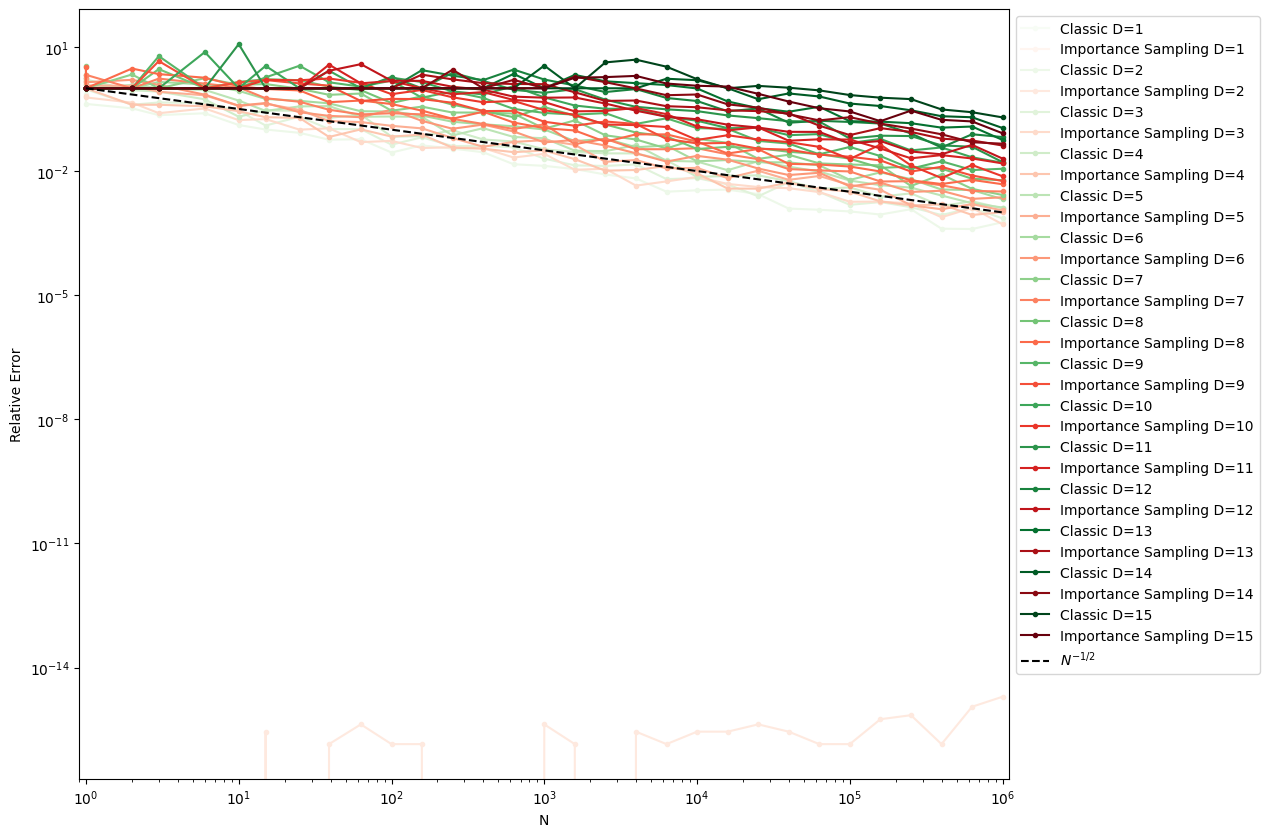

In [43]:
cmap_r = cm.get_cmap('Reds', len(D_values))
plt.figure(figsize=(12,10))
for i, D in enumerate(D_values):
    color = cmap(i)
    plt.loglog(N_values, errors[i], ".-", label=f'Classic D={D}', color=color)
    color = cmap_r(i)
    plt.loglog(N_values, errors_improved[i], ".-", label=f'Importance Sampling D={D}', color=color)
plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(min(N_values)*0.9, max(N_values)*1.1)
plt.show()

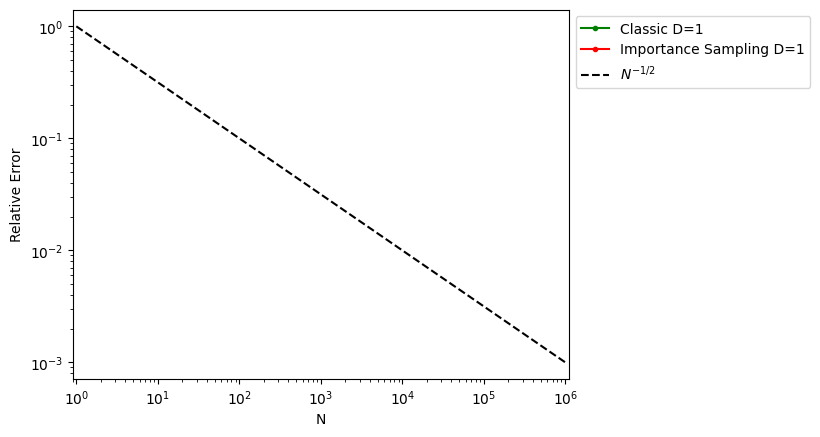

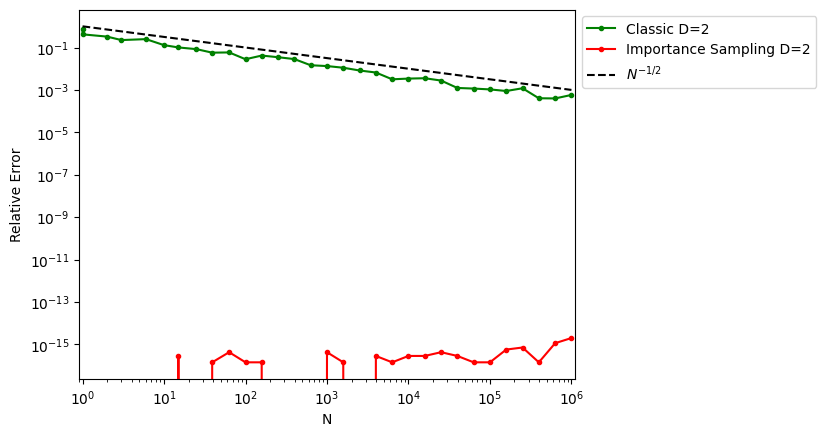

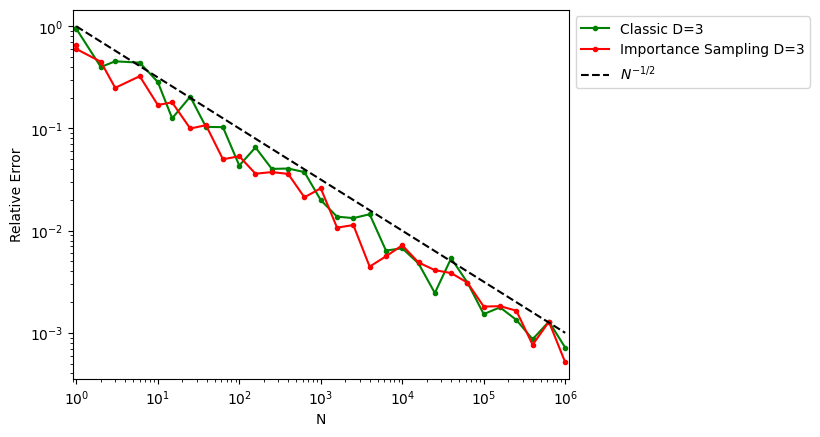

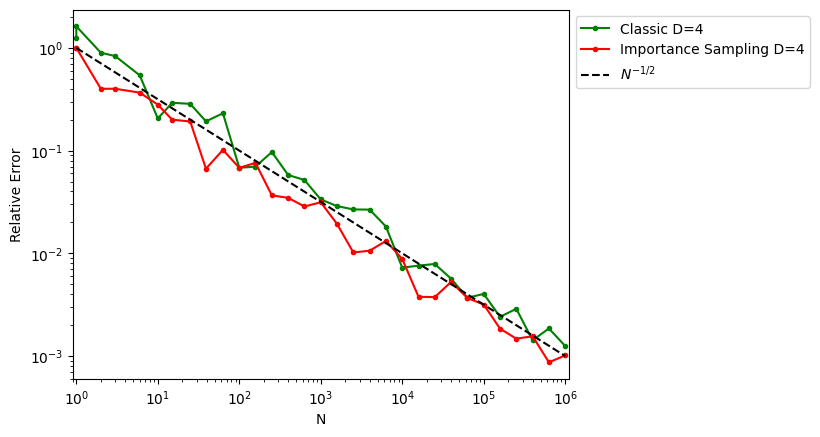

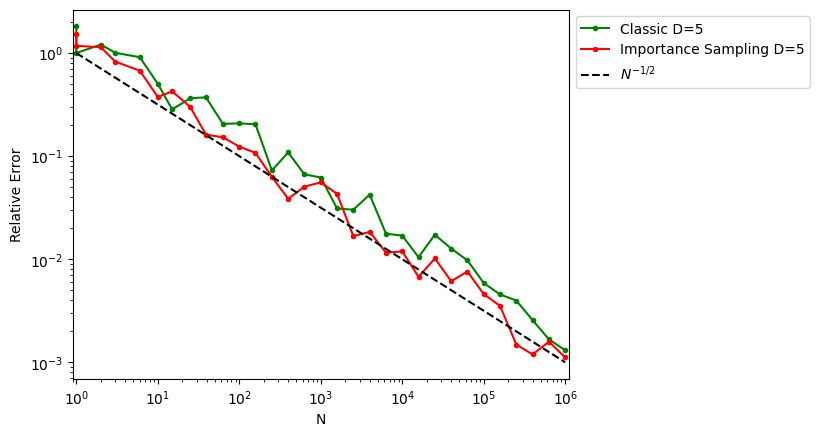

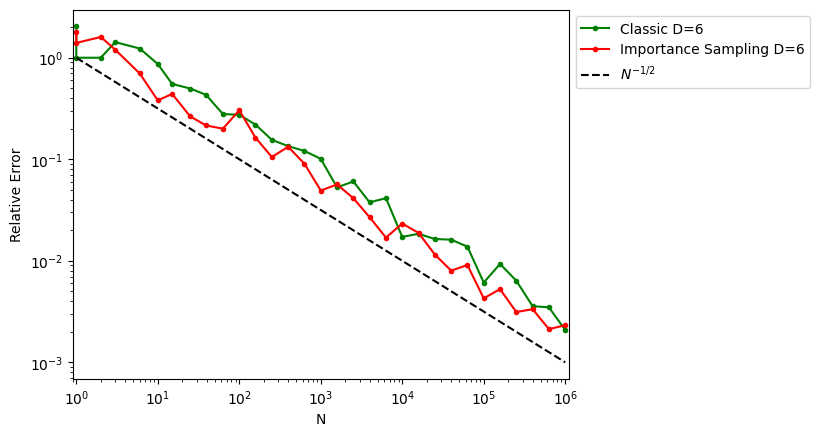

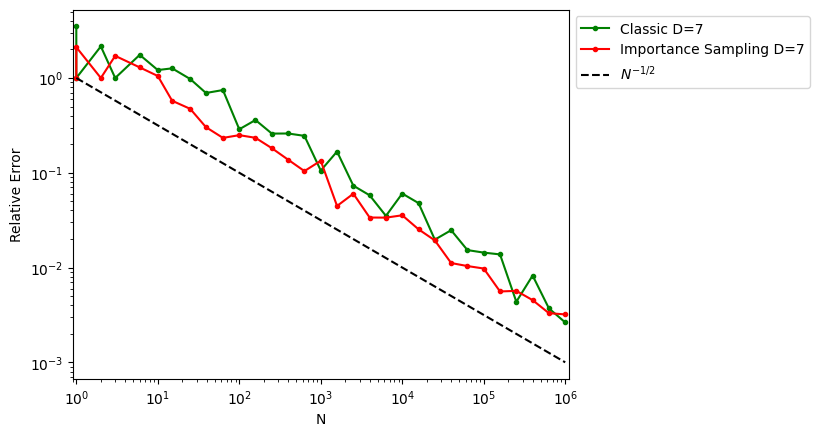

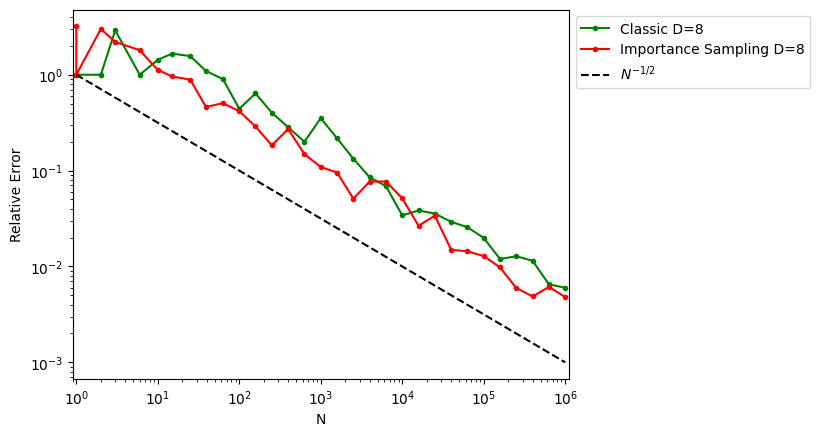

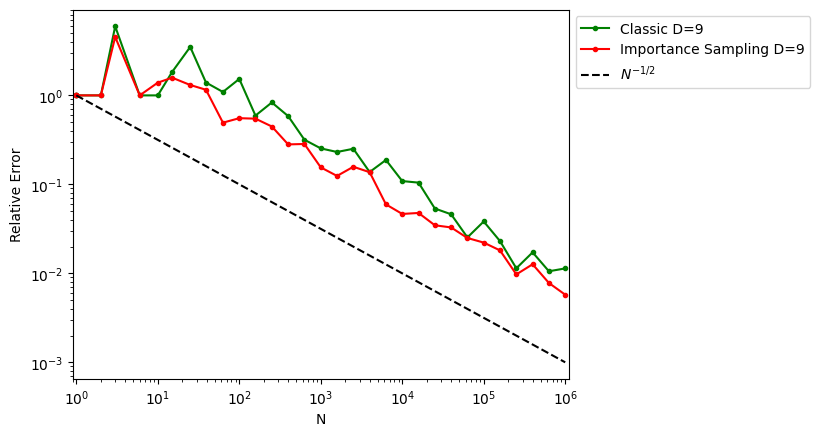

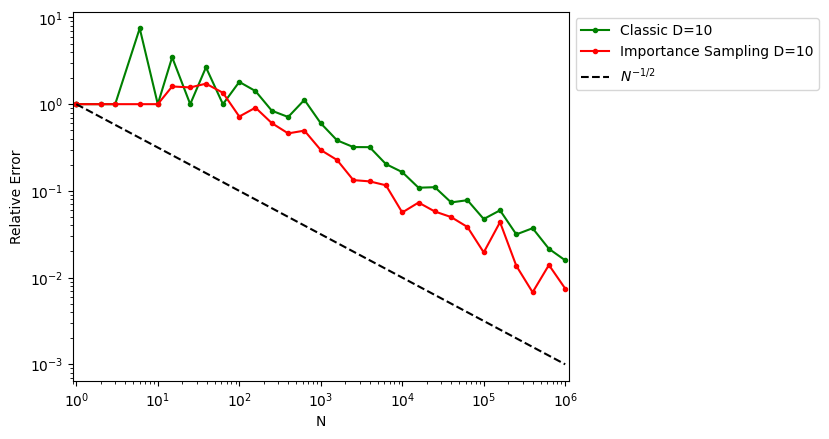

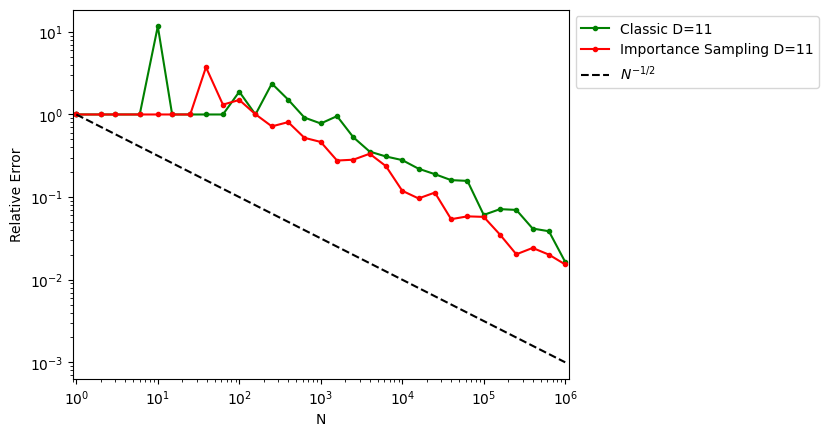

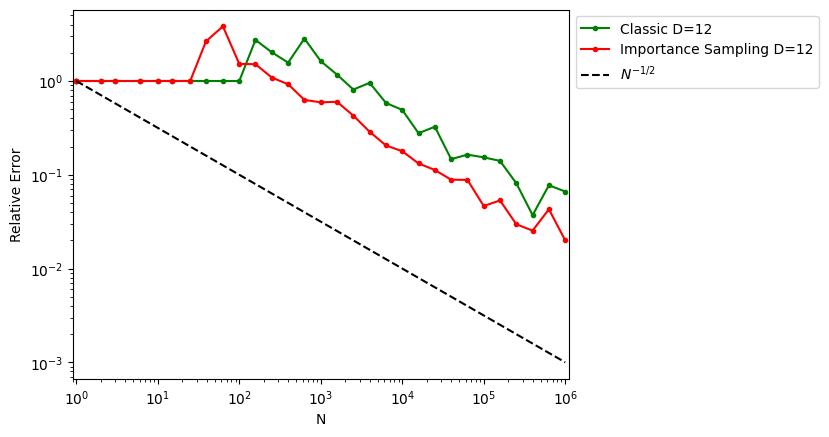

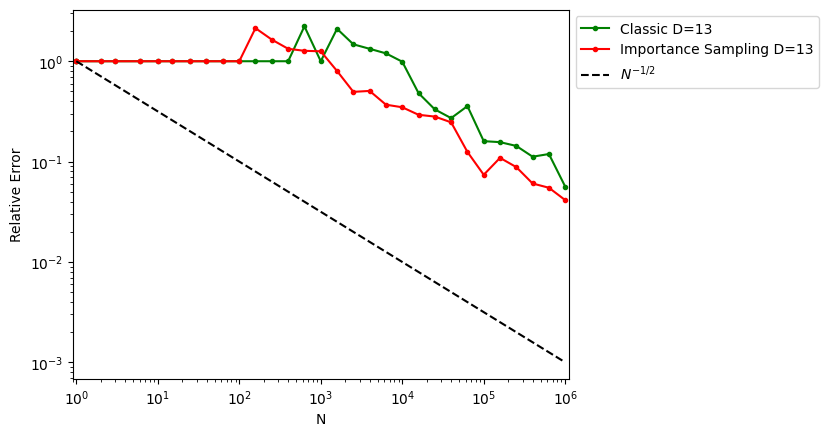

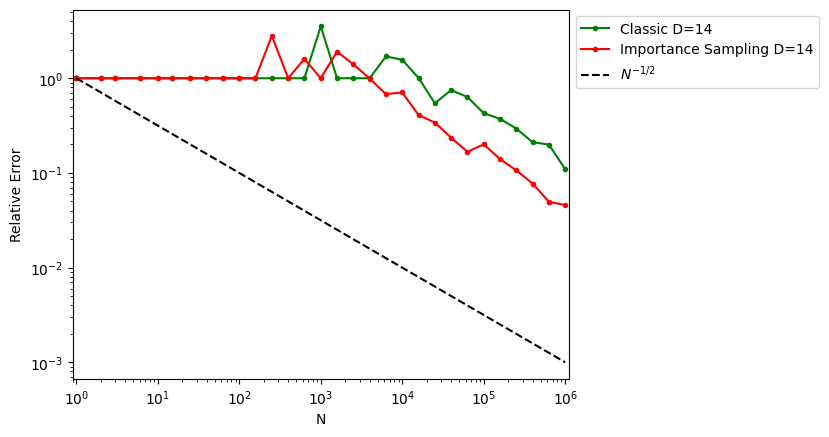

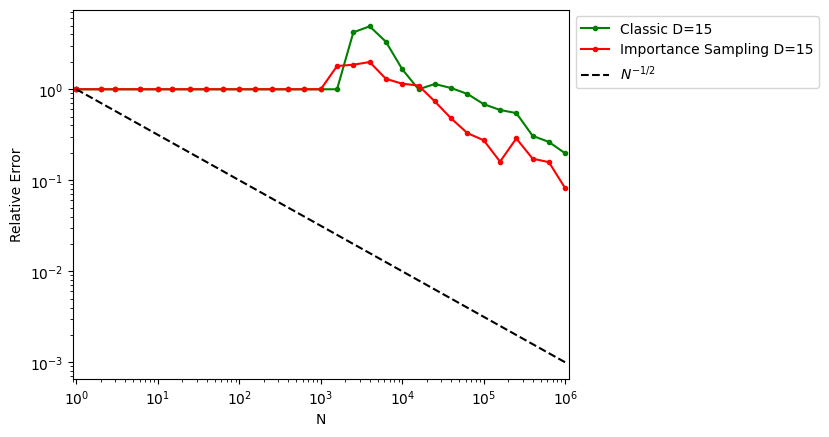

In [44]:
for i, D in enumerate(D_values):
    plt.figure()
    plt.loglog(N_values, errors[i], "g.-", label=f'Classic D={D}')
    plt.loglog(N_values, errors_improved[i], "r.-", label=f'Importance Sampling D={D}')
    plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
    plt.xlabel('N')
    plt.ylabel('Relative Error')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlim(min(N_values)*0.9, max(N_values)*1.1)
    plt.show()

Во всех случаях, выборка по значимости чуть лучше.

### 6. Теоретически оцените величину уменьшения ошибки при переходе ко второму методу.

Ошибка (дисперсия) стандартной оценки Монте-Карло для $\mathbb{E}_P[X] $ равна:
$$
   \text{var}_P\left[\widehat{\mathbb{E}}_P[X]\right] = \frac{\text{var}_P[X]}{n},
$$
   где $ n $ — количество образцов.

При выборке из $Q$ оценка принимает вид:
   $$
   \widehat{\mathbb{E}}_Q\left[\frac{X}{Y}\right] = \frac{1}{n} \sum_{i=1}^n \frac{X_i}{Y_i}, \quad X_i \sim Q,
   $$
   где $ Y = \frac{dP}{dQ} $ — отношение правдоподобия. Её дисперсия равна:
   $$
   \text{var}_Q\left[\widehat{\mathbb{E}}_Q\left[\frac{X}{Y}\right]\right] = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{n}.
   $$

Теоретически оптимальное $ Q^* $ минимизирует $ \text{var}_Q\left[\frac{X}{Y}\right] $. Для $ X \geq 0 $ оно задаётся как:
   $$
   Q^*(x) \propto |X(x)|P(x),
   $$
   что приводит к нулевой дисперсии, но на практике нереализуемо (поскольку требует знания $ \mathbb{E}_P[X] $).

**Относительное уменьшение ошибки** определяется отношением дисперсий:
$$
\text{Фактор уменьшения ошибки} = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]}.
$$
- Если $ \text{var}_Q\left[\frac{X}{Y}\right] \ll \text{var}_P[X] $, ошибка значительно уменьшается.
- Стандартное отклонение (ошибка) уменьшается на $ \sqrt{\frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]}} $.


Важное сэмплирование уменьшает ошибку на фактор, зависящий от отношения дисперсий $ \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]} $. Уменьшение теоретически не ограничено, но на практике зависит от выбора $ Q $, размерности задачи и вычислительных компромиссов. Эффективная реализация требует тщательного проектирования $ Q $ для фокусировки выборки на критических областях $ X $.

Ошибка (дисперсия) стандартной оценки Монте-Карло для $ \mathbb{E}_P[X] $ равна:

$$
\text{var}_P\left[\widehat{\mathbb{E}}_P[X]\right] = \frac{\text{var}_P[X]}{N},
$$
где $ N $ — количество образцов.

При выборке из распределения $ Q $ оценка принимает вид:

$$
\widehat{\mathbb{E}}_Q\left[\frac{X}{Y}\right] = \frac{1}{N} \sum_{i=1}^N \frac{X_i}{Y_i}, \quad X_i \sim Q,
$$
где $ Y = \frac{dP}{dQ} $ — отношение правдоподобия. Её дисперсия равна:

$$
\text{var}_Q\left[\widehat{\mathbb{E}}_Q\left[\frac{X}{Y}\right]\right] = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{N}.
$$

Теоретически оптимальное распределение $ Q^* $ минимизирует $ \text{var}_Q\left[\frac{X}{Y}\right] $. Для $ X \geq 0 $ оно задаётся как:

$$
Q^*(x) \propto |X(x)| P(x),
$$
что приводит к нулевой дисперсии, но на практике нереализуемо (поскольку требует знания $ \mathbb{E}_P[X] $).


Относительное уменьшение ошибки определяется отношением дисперсий:

$$
\text{Фактор уменьшения ошибки} = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]}.
$$

- Если $ \text{var}_Q\left[\frac{X}{Y}\right] \ll \text{var}_P[X] $, ошибка значительно уменьшается.
- Стандартное отклонение (ошибка) уменьшается на $ \sqrt{\frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]}} $.

Рассмотрим задачу вычисления объёма многомерного шара. В предыдущем подходе мы использовали равномерное распределение на кубе, что давало точный ответ для $ D = 1 $. Теперь мы улучшим точность, опираясь на известное значение площади круга, и получим метод, дающий точный ответ для $ D = 2 $.

Заметим, что если мы имеем пару случайных величин $ \mu $, $ \nu $, равномерно распределённых на интервале $[0, 1]$, то мы можем получить случайную точку $ (x, y) $, равномерно распределённую на круге $ x^2 + y^2 \leq 1 $:

$$
\begin{cases}
x = r \cos \phi, \\
y = r \sin \phi,
\end{cases}
\quad
\begin{cases}
\phi = 2\pi \mu, \\
r = \sqrt{\nu}.
\end{cases}
$$

Плотность распределения для $ (x, y) $ равна:

$$
p(x, y) = \frac{1}{\pi} \theta(x^2 + y^2), \quad
\theta(a) = \begin{cases}
1, & a < 1, \\
0, & \text{в противном случае}.
\end{cases}
$$

Идеальным распределением для вычисления объёма многомерного шара было бы равномерное распределение на этом шаре. В качестве приближения этого распределения мы берём произведение равномерных распределений на кругах:

$$
p(x) = p(x_1, x_2) p(x_3, x_4) \cdots
$$

### 7. Предложите свой способ уменьшения вариации оценки обьема шара по методу Монте-Карло.

## Замечание:

В методы выше тяжело было найти плотность распределения $p$, сгенерировать выборку величины с данным распределением часто проще.
Например, равномерное распределение на шаре $B$ можно получить из выборки $X_k$ равномерно распределенной на кубе $\Omega$ случайной величины,
отбрасывая все точки $X_k$, не лежащие в $B$, что является частным случаем метода [алгоритма Метрополиса-Гастингса](http://ru.wikipedia.org/wiki/Алгоритм_Метрополиса_—_Гастингса). Оказывается в ряде случаев достаточно уметь строить выборку для решения содержательных задач, как показано в следующем разделе.

# Модель Изинга

[Модель Изинга](https://en.wikipedia.org/wiki/Ising_model) является одной из самых простых моделей ферромагнетиков в статистической физике.
Ферромагнетик в этой модели описывается системой случайных величин $\sigma_n$, принимающих значения $\pm 1$,
соответстующих двум противоположным направлениям магнитного момента отдельного атома $n$.
Обычно атомы считаются оргинзованными в некоторую кристаллическую решетку,
в самом простом случае, который мы будем обсуждать ниже, атомы образуют цепочку, т.е. $n\in\mathbb Z$.
Энергия системы включает в себя вклады обмена и взаимодействия с внешним магнитным полем $h_j$:
$$H[\sigma] = -\sum_{<i,j>}J_{ij}\sigma_i\sigma_j-\mu\sum_i H_j\sigma_j,$$
где $J_{ij}$ суть константы обмена между парой атомов $\langle i,j\rangle$,
каждая пара атомов в сумме присутствует один раз,
$\mu$ - величина магнитного момента атома.
Вероятность реализации каждого состояниия подчинена распределению Больцмана:
$$
P_\beta(\sigma)=Z_\beta^{-1}e^{-\beta H[\sigma]},
$$
где $\beta=(k_BT)^{-1}$, и статистическая сумма определена следующей суммой по всем состояниям $\sigma$:
$$
Z_\beta = \sum_\sigma e^{-\beta H[\sigma]}.
$$
Вместо бесконечной цепочки, мы будем рассматривать цепочку из $L$ атомов, концы которой соединены между собой,
т.е. заданы периодические граничные условия.
Мы будем использовать самый простой вариант модели, считая (1) внешнее поле однородным  $h_j=h\forall j$,
(2) обмен ненулевым только для блищайших соседей и независящим от положения атомов на цепочке:
$J_{j,j+1}=J>0\forall j$.

При анализе модели наибольший интерес представляет свободная энергия Гельмгольца
$$F=-k_BT\ln Z.$$
В одномерном случае она может быть найдена явно.
Действительно,
$$Z_\beta=\sum_{\sigma_1}\cdots\sum_{\sigma_L}\prod_{n=1}^{N-1}T_{\sigma_n,\sigma_{n+1}},$$
где
$$T_{\sigma,\sigma'}=\exp\left(\beta J\sigma\sigma'+\frac{\mu h}{2}(\sigma+\sigma')\right).$$
Если считать $\sigma=-1,1$ индексами матрицы
$$T=\begin{pmatrix}T_{-1,-1} & T_{-1,1}\\ T_{1,-1} & T_{1,1}\end{pmatrix}
=\begin{pmatrix}e^{\beta J-\beta\mu h} & e^{-\beta J}\\ e^{-\beta J} & e^{\beta J+\beta\mu h}\end{pmatrix},$$
то стат. сумму можно записать в матричном виде:
$$Z_\beta=\mathrm{Tr}\,T^N=\lambda_+^N+\lambda_{-}^N,$$
где $\lambda_\pm$ суть собственные значения матрицы $T$.
Известно довольно мало других решений для модели Изинга, поэтому представляет интерес численный расчет свободной энергии.

Вычисление стат. суммы в данном случае заключается в суммировании $2^L$ слагаемых, что может быть сделано явно.
Однако с ростом числа спинов $L$ время работы растет экспоненциально, что делает прямое суммирование применимым только для малых систем.
Поэтому стат. суммы часто считают методами Монте-Карло.
Выше мы вычисляли интеграл с помощью Монте-Карло, однако метод с таким же успехом может использоваться и для сумм.
Так в простейшем варианте мы можем зафиксировать семейство случайных величин $s_n$, принимающих значения $-1$ и $1$ с одинаковой вероятностью.
Тогда стат. сумму можно выразить через среднее значение на равномерном распределении:
$$Z_\beta = 2^L E[e^{-\beta H[s]}|\text{uniform distribution}] \approx \frac{2^L}{N}\sum_{k=1}^N \exp\big(-\beta H[s^{(k)}]\big),$$
где $s^{(k)}$ выборка состояний системы, равномерно распределеных на всем пространстве состояний.
Разброс оценок стат. суммы этим методом можно оценить через дисперсию случайной величины $e^{-\beta H[s]}$ на равномерном распределении (см. задания ниже):
$$
D = D[2^L e^{-\beta H[s]}] = E[2^{2L} e^{-2\beta H[s]}] - E[2^L e^{-\beta H[s]}]^2
= 2^L Z_{2\beta}-Z_{\beta}^2.
$$

In [ ]:
from dataclasses import dataclass

# Объект типа dataclass: https://docs.python.org/3/library/dataclasses.html
# В нем мы будем хранить параметры системы.
@dataclass
class Ising:
    J: float # Константа обмена
    muh: float # Магнитная индукция
    L: int # Число спинов
    def energy(self, state):
        """"Энергия состояния `state`"""
        return -model.J*np.sum(state*np.roll(state, 1, axis=-1), axis=-1)-model.muh*np.sum(state, axis=-1)
    def all_states(self):
        """Возвращает все состояния системы"""
        # Для хранения одного спина можно было ограничиться одним битом, но для простоты мы будем хранить число со знаком.
        states = np.moveaxis( np.indices((2,)*model.L), 0, -1 ).reshape((2**model.L, model.L)).astype(np.int8)
        return 2*states-1
    def random_states_uni(self, n):
        """Возвращает `n` случайных значений."""
        return 2*np.random.randint(0, 2, n*model.L, dtype=np.int8).reshape((n,model.L))-1

def partition_function_expl(model: Ising, beta: float) -> float:
    """Вычисляет стат. сумму одномерной модели Изинга по явной формуле."""
    ebj = np.exp(beta*model.J)
    ebb = np.exp(beta*model.muh)
    T = np.array([[ebj/ebb, 1/ebj], [1/ebj, ebj*ebb]])
    lambdas = np.linalg.eigvalsh(T)
    return np.sum(np.power(lambdas, model.L))

def partition_function_direct(model: Ising, beta: float) -> float:
    """Вычисляет стат. сумму одномерной модели Изинга по определению."""
    energy = model.energy(model.all_states())
    return np.sum(np.exp(-beta*energy))

def partition_function_mc(model: Ising, beta:float, nsamples:int) -> float:
    """Оценивает стат. сумму одномерной модели Изинга по Монте-Карло."""
    states = model.random_states_uni(nsamples)
#     states = model.all_states()
    energy = model.energy(states)
    p = np.exp(-beta*energy)
    return np.mean(p)*2**model.L


model = Ising(J=1.0, muh=0.1, L=1)
beta = 1.
print(f"Model {model} beta {beta}")
print(f"(ln Z)/L =")
print(f"  explicit   : {np.log(partition_function_expl(model, beta))/model.L}")
if model.L<=20:
    print(f"  direct     : {np.log(partition_function_expl(model, beta))/model.L}")
nsamples = 10000
print(f"  Monte-Carlo: {np.log(partition_function_mc(model, beta, nsamples))/model.L} #samples {nsamples}")


Model Ising(J=1.0, muh=0.1, L=1) beta 1.0
(ln Z)/L =
  explicit   : 1.6981388693815918
  direct     : 1.6981388693815918
  Monte-Carlo: 1.6991748796816446 #samples 10000


## Задания.

### 8. Оцените точность вычисления $Z_\beta$ через собственные значения матрицы $T$. Как ведет себя погрешность при $\beta\to 0$,
$\beta\to\infty$ и $L\to\infty$? Для оценки погрешностей собственных значений матрицы удобно воспользоваться [теоремой Бауэра-Фике](https://en.wikipedia.org/wiki/Bauer%E2%80%93Fike_theorem).

### 9. Найдите узкие места в реализации вычисления стат. суммы прямым суммированием: как растет использование памяти с размером задачи, какие вычисления проводяться повторно? Предложите оптимизацию функции `partition_function_direct`. Для какого максимального размера системы можно на практике использовать эту функцию?

### 10. Вычислите стат. сумму методом Монте-Карло с равномерно и независимо распределенными случайными величинами $s$. Оцените скорость сходимости метода. Для относительной погрешности $10^{-5}$ оцените число спинов, начиная с которого метод Монте-Карло оказывается предпочтительнее прямого суммирования, если стоимость вычислений измерять в числе вызовов функции энергии $H$.

### 11. Найдите плотность состояний с помощью [алгоритма Ванга-Ландау](https://en.wikipedia.org/wiki/Wang_and_Landau_algorithm). Найдите стат. сумму, используя плотность состояний. Сравните результат с результатом методе Монте-Карло из предыдущего пункта. Можно ли вычислить стат. сумму методом Метрополиса-Гастингса? Какой из методов дает лучший результат?

### 12. Постройте график зависимости средней энергии от константы связи $J$, используя (1) найденную численно оценку для стат. суммы, (2) плотность состояний из метода Ванга-Ландау. Сравните с теорией. Что удается найти точнее: среднюю энергию или стат. сумму?

### 13. Постройте тот же график без вычисления стат. суммы, опираясь только на метод [Метрополиса-Гастингса](http://ru.wikipedia.org/wiki/Алгоритм_Метрополиса_—_Гастингса) для генерирования выборки состояний $\sigma$, подчиненных распределению Больцмана.

### 14. Постройте график зависимости намагниченности от приложенного поля, используя связь стат. суммы и намагниченности:
$$M=\frac{\partial \ln Z}{\partial \mu h},$$
и сравните с расчетом намагниченности (как суммы магнитных моментов всех атомов) по алгоритму Метрополиса-Гастингса.

### 15. В модели с цепочкой не наблюдается фазового перехода, однако на двухмерной решетке есть фазовый переход по температуре.
Постройте график зависимости средней намагниченности от температуры для двухмерной решетки спинов.
Найдите критическое значение температуры. Опишите состояния при температуре ниже и выше критической.

### Подсказка

Алгоритм Ванга-Ландау выполняет случайное блуждание по состояниям подобно алгоритму Метрополиса-Гастингса, однако он посещает все подмножества постоянной энергии с одинаковой вероятностью, т.е. он генерирует выборку состояний равномерную по энергии. Так как равномерная выборка возможно только на множестве конечной меры, то в случае не ограниченной энергии системы посещаться будет только заданный интервал энергий. В случае модели Изинга число состояний конечно и мы будем блуждать по всем состояниям.

Для распределения Больцмана плотность вероятности распределения по состояниям имеет вид $Z^{-1}e^{-\frac{E[s]}{k_BT}}ds$.
Домножив на экспоненту с плюсом мы можем получить равномерное распределение $ds$ по всем состояниям $s$.
Нас однако интересует равномерное распределение по энергиям, которое можно задать с помощью [плотности состояний](https://https://en.wikipedia.org/wiki/Density_of_states) $D(E)$, которая грубо говоря равна отношению числа состояний обладающих заданной энергией к общему числу состояний.
Равномерное по энергиям распределение имеет вид $D(E(s))ds = dE$,
где плотность состояний нормирована на единицу
$\int_{\mathbb R}D(E)dE=1$.
Для приближения этого распределения алгоритм Ванга-Ландау строит оценку плотности состояний, которая может затем быть использована для вычисления средних значений величин от энергии, включая стат. сумму:
$$Z=\int_{\Omega} e^{\frac{E[s]}{k_BT}}ds
=\int_{\mathbb R}\left(e^{\frac{E}{k_BT}}\int_{s\colon E[s]=E}d\,s\right)dE
=\mathrm{vol}(\Omega)\int_{\mathbb R}e^{\frac{E}{k_BT}}D(E)dE.$$
Пространство состояний в модели Изинга дискретное, его объем совпадает с числом различных состояний:
$$\mathrm{vol}(\Omega)=2^L.$$

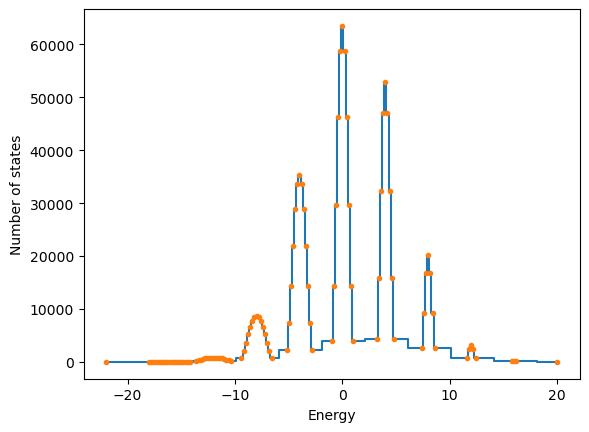

Z = 1569505.5918326946 via DOS
Z = 1569505.5918326934 by definition


In [ ]:
# Найдем плотность состояний перебором всех состояний.
model = Ising(J=1.0, muh=0.1, L=20)
all_energies = np.sort( model.energy(model.all_states()) ) # Массив всех возможных значений энергии.
# plt.plot(all_energies,','); plt.show()
# Группируем одинаковые элементы и считаем их количество
from collections import Counter
density_of_states = Counter(all_energies)
# Извлекаем из счетчика отдельно массив энергию, отдельно число состояний для данной энергии.
energy, number_of_states = np.array(list(density_of_states.items())).T
# Строим график плотности состояний.
plt.step(energy, number_of_states, '-', where='mid',)
plt.plot(energy, number_of_states, '.')
plt.xlabel("Energy")
plt.ylabel("Number of states")
plt.show()
# Имея распределение состояний по энергиям сосчитаем стат. сумму.
beta = .2
Z_dos = np.sum(number_of_states*np.exp(-beta*energy))
Z_exp = partition_function_expl(model, beta) # стат. сумма через определение для сравнения
print(f"Z = {Z_dos} via DOS")
print(f"Z = {Z_exp} by definition")

Алгоритм Ванга-Ландау (ВЛ) последовательно приближает плотность состояний $g(E)$ и является одним из эффективных способов ее оценивания.
Алгоритм стартует со случайного состояния $s^0$ и некоторого приближения (чаще константного) для плотности состояний.
На каждом шаге алгоритма строится новое случайное состояние $s^n$, которое принимается со вероятностью
$P=\min(1,\frac{ g(E(s^{n-1})) }{ g(E(s^{n})) })$.
Приближение плотности состояний обновляется на каждом шаге по формуле
$g(E(s^n))\mapsto g(E(s^n))\cdot f$, где $f>1$ некий множитель.
Для увеличения точности множитель $f$ время от времени тоже обновляется $f\mapsto\sqrt{f}$.
Есть несколько законов для обновления $f$, чаще всего момент обновления определяется по достаточной равномерности гистограммы энергии посещенных состояний.
На практике удобнее хранить логарифм плотности $S(E)=\ln g(E)$, чтобы избежать переполнения.

Подробное обсуждение алгоритма Ванга-Ландау можно найти в статье [arXiv:1808.09251](https://arxiv.org/pdf/1808.09251.pdf).

In [ ]:
from collections import defaultdict
# Простая реализация алгоритма Ванга-Ландау (число состояний считается для каждой энергии, без объединения в группы).
def WangLandauAlgorithm(model:Ising, nsamples=None):
    H = defaultdict(lambda: 0) # Хранилище для гистограммы.
    g = defaultdict(lambda: 1.) # Хранилище для плотности состояний
    f = 1.4 # Множитель для обновления числа состояний.
    state = model.random_states_uni(1) # Начальное состояние
    energy = model.energy(state)[0] # Энергия текущего состояния
    H[energy] = H[energy] + 1
    g[energy] = g[energy] * f
    rejected = 0
    for it in range(nsamples): # Делаем заданное число итераций.
        # Генерируем новое состояние
        candidate = model.random_states_uni(1) # Новое состояние.

        # Обычно новое состояние генерируется небольшим возмущением старого состояний `state`,
        # так как в этом случае энергия меняется плавнее, и время пересчета энергии меньше.
        # Например, это можно было делать так:
#         candidate = state.copy()
#         candidate[0, np.random.randint(model.L)] *= -1
        # Затем на нужно было бы реализовать функцию обновления энергия, учитывая изменение лишь одного спина.

        candidate_energy = model.energy(candidate)[0] # Считаем энергию нового состояния.
        p = np.minimum(1., g[energy]/g[candidate_energy]) # Вероятность принятия состояния.
        if np.random.random()<=p: #  Если состояние принято,
            state = candidate # обновляем состояние.
            energy = candidate_energy
        else:
            rejected += 1
        H[energy] = H[energy] + 1
        g[energy] = g[energy] * f
        # Проверяем возможность обновления шага `f`.
        vals=np.array(list(H.values()))
        std, mean = np.std(vals), np.mean(vals)
        if len(vals)>10 and std/mean<0.25:
            print(f"Restart {it = }: {f = }")
            f = np.sqrt(f) # Уменьшаем шаг.
            H = defaultdict(lambda:0) # Обнуляем накопленные значения.
    print(f"Rejected states {rejected}/{nsamples}")
    # Перенормируем энтропию.
    g_sum = np.sum(list(g.values()))
    total_count_elements = 2**model.L
    return { k: total_count_elements*s/g_sum for k,s in g.items() }

In [ ]:
# Алгоритма Ванга-Ландау с группировкой энергий по группам.
def WangLandauAlgorithmBins(model:Ising, nsamples=None, nbins=None):
    # Максимальная возможная энергия.
    maxE = model.L*(model.J+model.muh)
    # Наименьшая возможная энергия.
    minE = -maxE
    def find_bin(e): # Находит столбец гистрограммы, в который попадает энергия.
        return int(np.round((e-minE)/(maxE-minE)*nbins))
    H = np.zeros(nbins) # Хранилище для гистограммы.
    g = np.ones(nbins) # Хранилище для плотности состояний
    f = 1.4 # Множитель для обновления числа состояний.
    state = model.random_states_uni(1) # Начальное состояние
    energy = model.energy(state)[0] # Энергия текущего состояния
    energy_bin = find_bin(energy)
    H[energy_bin] += 1
    g[energy_bin] *= f
    rejected = 0
    for it in range(nsamples): # Делаем заданное число итераций.
        # Генерируем новое состояние
        candidate = model.random_states_uni(1) # Новое состояние.

        # Обычно новое состояние генерируется небольшим возмущением старого состояний `state`,
        # так как в этом случае энергия меняется плавнее, и время пересчета энергии меньше.
        # Например, это можно было делать так:
#         candidate = state.copy()
#         candidate[0, np.random.randint(model.L)] *= -1
        # Затем на нужно было бы реализовать функцию обновления энергия, учитывая изменение лишь одного спина.

        candidate_energy = model.energy(candidate)[0] # Считаем энергию нового состояния.
        candidate_bin = find_bin(candidate_energy)
        p = g[energy_bin]/g[candidate_bin] if g[candidate_bin]>g[energy_bin] else 1. # Вероятность принятия состояния.
        if np.random.random()<=p: #  Если состояние принято,
            state = candidate # обновляем состояние.
            energy = candidate_energy
            energy_bin = candidate_bin
        else:
            rejected += 1
        H[energy_bin] += 1
        g[energy_bin] *= f
        # Проверяем возможность обновления шага `f`.
        std, mean = np.std(H), np.mean(H)
        if mean>10 and std<0.25*mean:
            print(f"Restart {it = }: {f = }")
            f = np.sqrt(f) # Уменьшаем шаг.
            H[:] = 0 # Обнуляем гистограмму.
    print(f"Rejected states {rejected}/{nsamples}")
    # Перенормируем  число состояний.
    g_sum = np.sum(g)
    total_count_elements = 2**model.L
    return np.linspace(minE, maxE, nbins), total_count_elements/g_sum*g

Rejected states 427/1048
Rejected states 544/1048
aggregate_to_bins(x.shape=(64,), y.shape=(64,), rng.shape=(100,))
np.max(rng)=22.0 np.max(x)=15.8
aggregate_to_bins(x.shape=(102,), y.shape=(102,), rng.shape=(100,))
np.max(rng)=22.0 np.max(x)=20.0


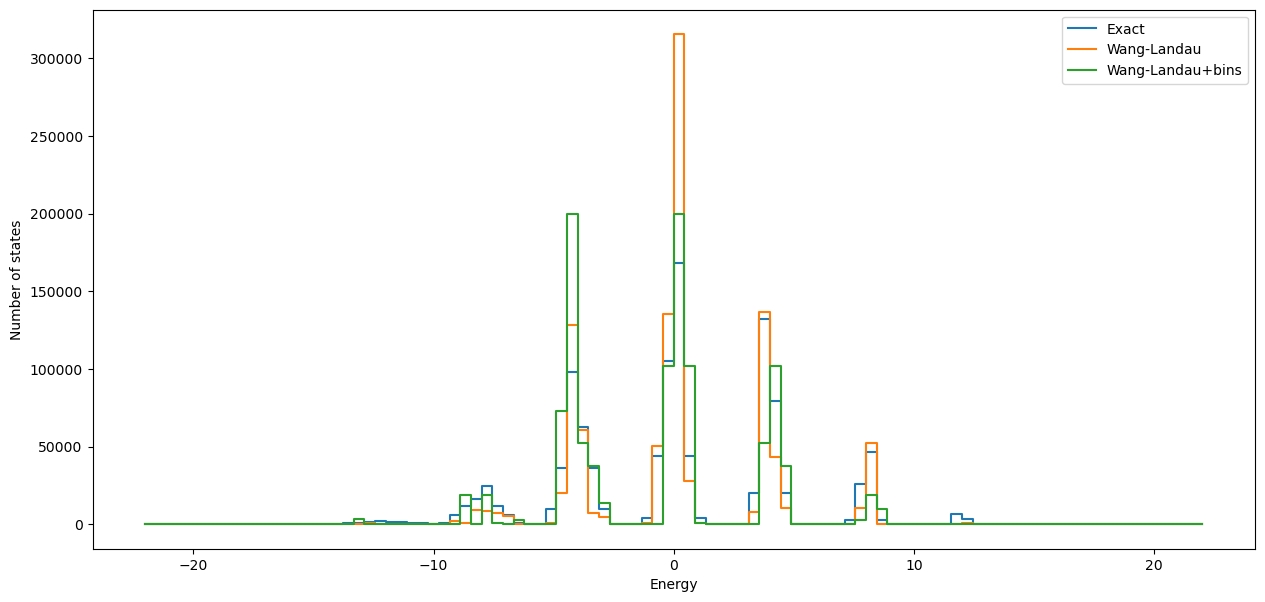

  0% Z = 1569505.5918326934 by definition
 17% Z = 1304889.415615905 doing Wang-Landau
  2% Z = 1593992.1368645225 doing Wang-Landau + bins
  0% Z = 1574176.5438497749 doing Monte-Carlo


In [ ]:
# Вычислим стат. сумму разными способами.
# Делаем на порядки меньшее попыток, чем общее число состояний.
nsamples = 2**model.L//1000
density_of_states_wl = WangLandauAlgorithm(model, nsamples=nsamples)
energy_wl, number_of_states_wl = np.array(list(density_of_states_wl.items())).T
# В-Л с группировкой состояний.
nbins = 100 # Число групп
energy_wlb, number_of_states_wlb = WangLandauAlgorithmBins(model, nsamples=nsamples, nbins=nbins)

# Группируем состояния
def round_to_bin(x, rng): #  Находим для каждого x ближайший узел на равномерной решетке.
    print(f"{np.max(rng)=} {np.max(x)=}")
    return np.round( (x-rng[0])/(rng[-1]-rng[0])*(len(rng)-1) ).astype(np.int32)
def aggregate_to_bins(x, y, rng): # Складываем значения y, соответствующие одному значению x.
    print(f"aggregate_to_bins({x.shape=}, {y.shape=}, {rng.shape=})")
    n = round_to_bin(x, rng)
    count = np.zeros(rng.shape, dtype=np.int32)
    for k, v in zip(n, y):
        count[k] += v
    return count
number_of_states_wl_bins = aggregate_to_bins(energy_wl, number_of_states_wl, energy_wlb)
number_of_states_bins = aggregate_to_bins(energy, number_of_states, energy_wlb)

# Строим график плотности состояний.
fig, ax1 = plt.subplots(1,1,figsize=(15,7))
ax1.step(energy_wlb, number_of_states_bins, '-', where='mid', label='Exact')
ax1.step(energy_wlb, number_of_states_wl_bins, '-', where='mid', label='Wang-Landau')
ax1.step(energy_wlb, number_of_states_wlb, '-', where='mid', label='Wang-Landau+bins')
ax1.set_xlabel("Energy")
ax1.set_ylabel("Number of states")
ax1.legend()
plt.show()
# Имея распределение состояний по энергиям сосчитаем стат. сумму.
error = lambda Z: int(np.round(np.abs(Z-Z_exp)/Z_exp*100))
print(f"{error(Z_exp):>3}% Z = {Z_exp} by definition")
Z_wl= np.sum(number_of_states_wl*np.exp(-beta*energy_wl)) # Как среднее дискретной случайно величины.
print(f"{error(Z_wl):>3}% Z = {Z_wl} doing Wang-Landau")
# Интегрируем экспоненту по энергиям с весом, заданным плотностью состояний.
integrand = number_of_states_wlb*np.exp(-beta*energy_wlb) # Подинтегральное выражение на dE.
# Сначала по формуле трапеций:
Z_wlb_trapz= np.sum(integrand)
print(f"{error(Z_wlb_trapz):>3}% Z = {Z_wlb_trapz} doing Wang-Landau + bins")
Z_mc = partition_function_mc(model, beta, nsamples)
print(f"{error(Z_mc):>3}% Z = {Z_mc} doing Monte-Carlo")

## Задания:

### 16. Убедитесь, что ваш код хорошо структуирован, в частности: (a) одни и те же действия не выполняются в разных частях кода; (б) все вычисления разбиты на функции, каждая из которых имеет четкое и понятное предназначение и легко читается; (с) все параметры указаны явно, каждый параметр задается ровно в одном месте.

Ising(J=1.0, muh=0.1, L=100)

CPU times: user 3.83 s, sys: 11 ms, total: 3.84 s
Wall time: 3.84 s


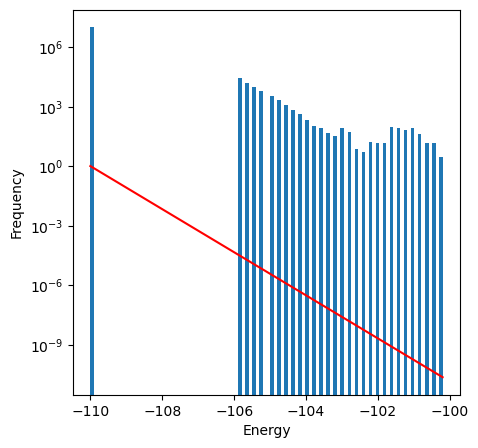

In [ ]:
# Быстрая реализация алгоритма Метрополиса-Гастингса с использованием numba.
import numba as nb

# return -model.J*np.sum(state*np.roll(state, 1, axis=-1), axis=-1)-model.muh*np.sum(state, axis=-1)

@nb.njit('f4(i1[:],i4,f4,f4)')
def energy_variation_by_flip(state, spin, J, muh):
    n = state.shape[0]
    a, b, c = state[(spin-1)%n], state[spin%n], state[(spin+1)%n]
    # e0 = -J*(a*b+b*c)-muh*b
    # e1 = -J*(a*(-b)+(-b)*c)-muh*(-b)
    de = 2*(J*(a+c)+muh)*b  # e1-e0
    return de

@nb.njit('f4[:](i1[:],i4,i4,f4,f4,f4)')
def metropolis(state, nsamples, pause, J, muh, kBT):
    N = state.shape[0]
    samples = np.empty(nsamples, dtype=np.float32)
    # Compute initial energy.
    eJ, eh = 0., 0.
    for n in range(N-1):
        eJ += state[n]*state[n+1]
        eh += state[n]
    eJ += state[0]*state[N-1]
    eh += state[N-1]
    samples[0] = e = -J*eJ-muh*eh
    # Run simulation.
    for n in range(1,nsamples):
        for k in range(pause):
            # Find a candidate for flip.
            q = np.random.randint(N)
            # Energy variation by the swap.
            de = energy_variation_by_flip(state, q, J, muh)
            # Acceptance rate
            alpha = np.exp(-de/kBT)
            # Test transition.
            u = np.random.random()
            if u<=alpha: # Accept.
                state[q] *= -1
                e += de
        samples[n] = e
    return samples

model = Ising(J=1.0, muh=0.1, L=100)
display(model)
state = model.random_states_uni(1).flatten()
kBT = 0.4
%time samples = metropolis(state, 10000000, 10, model.J, model.muh, kBT)
samples = samples[10000:]

e_min = np.min(samples)
e_range = np.linspace(e_min, np.max(samples), 100)
prediction = np.exp(-(e_range-e_min)/kBT)

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(samples[1000:], bins=100, log=True)
ax.plot(e_range, prediction, '-r')
ax.set_xlabel("Energy")
ax.set_ylabel("Frequency")
plt.show()